In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("autos.csv", header = None)


<font size= "3"> Print the first 5 rows from the top and the from the bottom

In [13]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
df.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


<font size= "3"> Add `headers` to the `DataFrame`

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]


df.columns = headers

<font size= "3"> Replace the `?` with `NAN` in the dataframe using `replace` function

In [32]:
df = df.replace("?", np.nan)
df.head(5)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_nan
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,17450


<font size = "3"> Chech if there is any `NAN` in a certain column and find the index of the `NAN` values in a column

In [28]:
#check
df["price"].isnull().values.any()
#find the indeces of NAN values
nan_idx = df.loc[pd.isna(df["price"]), :].index
print(nan_idx)
print(df["price"].isnull())

Int64Index([], dtype='int64')
0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Name: price, Length: 205, dtype: bool


<font size= "3">**Count the missing values in each column**

In [114]:
missed_values = df.isnull()

for col in missed_values.columns.values.tolist():
    
    if True in missed_values[col].values:
        print(missed_values[col].name,missed_values[col].value_counts())


normalized-losses False    164
True      41
Name: normalized-losses, dtype: int64
num-of-doors False    203
True       2
Name: num-of-doors, dtype: int64
bore False    201
True       4
Name: bore, dtype: int64
stroke False    201
True       4
Name: stroke, dtype: int64
horsepower False    203
True       2
Name: horsepower, dtype: int64
peak-rpm False    203
True       2
Name: peak-rpm, dtype: int64


<font size=3> Replace the `Nan` values with a `mean` value in the *price* column <br>
#### Inplacebool, default False

        Whether to modify the DataFrame rather than creating a new one.


In [30]:
price_avg = df["price"].astype("float64").mean(axis=0)

df["price_nan"] = df["price"].replace(np.nan, price_avg)

df[["price", "price_nan"]].isnull().values.any()


False

<font size="3"> Drop the rows if there is `NAN` values

In [35]:
df1 = df.dropna(subset=["price"], axis = 0)
#df1.isnull()
nan_idx = df.loc[pd.isna(df["price"]), :].index
#print(df1["price"].isna())

df1.to_csv("automobile.csv", header=True, index= False)

<font size="3"> Check data type (`df.dtypes`) and get a statistical overview (`df.describe()`, `include="all"` is optional) on each column. <br>
<font size="2"> 1. The `string` type in `pandas` is `object` <br>
<font size="2"> 2. The `int` type in `pandas` is `int64` <br>
<font size="2"> 3. The `float` type in `pandas` is `folat64` <br>

In [45]:
df.head(9)
print(df["symboling"].dtypes, df["price"].dtypes, df["wheel-base"].dtypes )

int64 object float64


In [51]:
df.describe()
df.describe(include= "all")

# describe for certain columns
df[["symboling","price", "wheel-base"]].describe(include="all")

,symboling,price,wheel-base
count,201.000000,201,201.000000
unique,NaN,186,NaN
top,NaN,8921,NaN
freq,NaN,2,NaN
mean,0.840796,NaN,98.797015
std,1.254802,NaN,6.066366
min,-2.000000,NaN,86.600000
25%,0.000000,NaN,94.500000
50%,1.000000,NaN,97.000000
75%,2.000000,NaN,102.400000


Another more concise way to get a summary of your dataset is `df.info()`

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

#### Binding Data in Pandas

Text(0.5, 1.0, 'Horsepower bins')

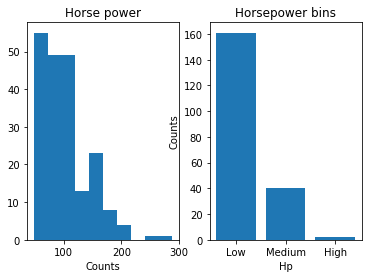

In [167]:
import matplotlib as plt
from matplotlib import pyplot


df = df.dropna(subset=["horsepower"], axis = 0)
df["horsepower"].astype(int)

#fig = plt.figure(figsize=(6,8))
# To obtain side-by-side subplots, pass parameters 1, 2 for one row and two columns.
fig, (ax1, ax2) = pyplot.subplots(1, 2)

ax1.hist(df["horsepower"])
ax1.set_xlabel("Hp")
ax1.set_xlabel("Counts")
ax1.set_title("Horse power")


# Create bins from min, max values of horse power with 4 points
bins = np.linspace(df["horsepower"].min(), df["horsepower"].max(), 4)
bin_names = ["Low", "Medium", "High"]

#create bins uisng cut()
df["hp_bins"] = pd.cut(df["horsepower"], bins, labels = bin_names, include_lowest = True)
counts = df["hp_bins"].value_counts()

ax2.bar(bin_names, counts)
ax2.set_xlabel("Hp")
ax2.set_ylabel("Counts")
ax2.set_title("Horsepower bins")

<font size = "3"> **Indicator variables (or dummy variables)** <br> <font size = "2">An indicator variable (or dummy variable) is a numerical variable used to label categories. 
They are called 'dummies' because the numbers themselves don't have inherent meaning. <br>
We will use pandas' method 'get_dummies' to assign numerical values to different categories of fuel type. 

In [196]:

#dummy_var1 = pd.get_dummies(df["fuel-type"])
#dummy_var1.columns=["diesel_type", "gas_type"]
#dummy_var1.columns
# concatenate two columns

#df = pd.concat([df["fuel-type"], dummy_var1], axis = 1)

# now drop original column "fuel-type" from "df"
#df.drop("fuel-type", axis = 1, inplace=True)


In [194]:
df.to_csv("cleaned_data_autobomiles.csv", index = None)